In [1]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#re-size all the images to this
IMAGE_SIZE=[224,224]
 
#Train data(images) path
train_path='C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train'
 
#Test data(images) path
valid_path='C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test'

In [3]:
resnet50=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
 
#dont train existing weights
for layer in resnet50.layers:
    layer.trainable=False

In [4]:
#Getting number of classes
folders=glob('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train/*')

In [5]:
#Our layers - you can add more layer if you want

x=Flatten()(resnet50.output)
 
#Defined the output layer

prediction=Dense(len(folders),activation='sigmoid')(x)
 

# create a model

In [6]:
model=Model(inputs=resnet50.input,outputs=prediction)
 
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')
print('='*100)
#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')

Training length:

Found 502 images belonging to 2 classes.
Test length:

Found 509 images belonging to 2 classes.


# Train the model

In [9]:
r=model.fit(training_set,
 validation_data=test_set,
 epochs=30,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set))

Epoch 1/30


16/16 [==============================] - 146s 9s/step - loss: 5.2544 - accuracy: 0.5080 - val_loss: 2.4907 - val_accuracy: 0.5069
Epoch 2/30
16/16 [==============================] - 130s 8s/step - loss: 1.6010 - accuracy: 0.5438 - val_loss: 0.8506 - val_accuracy: 0.6267
Epoch 3/30
16/16 [==============================] - 131s 8s/step - loss: 0.9170 - accuracy: 0.5876 - val_loss: 0.7149 - val_accuracy: 0.6287
Epoch 4/30
16/16 [==============================] - 131s 8s/step - loss: 0.5953 - accuracy: 0.6653 - val_loss: 0.6683 - val_accuracy: 0.6208
Epoch 5/30
16/16 [==============================] - 130s 8s/step - loss: 0.6714 - accuracy: 0.6096 - val_loss: 0.7702 - val_accuracy: 0.5914
Epoch 6/30
16/16 [==============================] - 131s 8s/step - loss: 0.6837 - accuracy: 0.6335 - val_loss: 0.7258 - val_accuracy: 0.5992
Epoch 7/30
16/16 [==============================] - 130s 8s/step - loss: 0.6040 - accuracy: 0.6773 - val_loss: 0.6513 - val_accuracy: 0.6385
Epoch 8/30


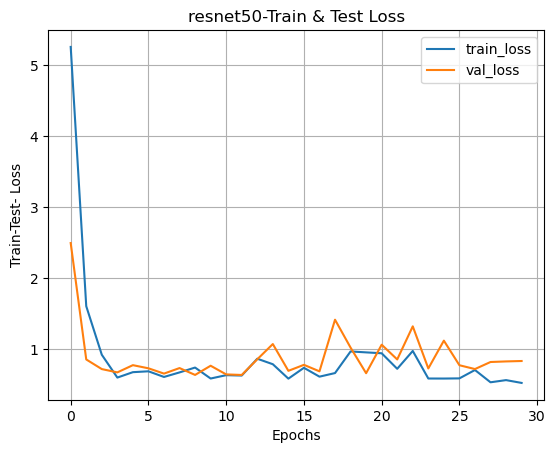

<Figure size 640x480 with 0 Axes>

In [10]:
#loss
plt.title('resnet50-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Loss & Val_loss')

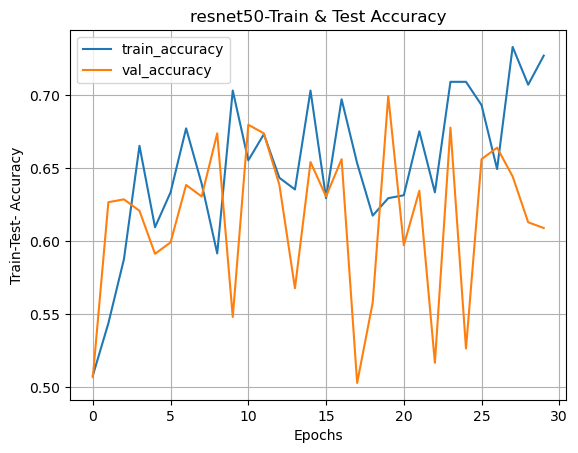

<Figure size 640x480 with 0 Axes>

In [11]:
#Accuracy
plt.title('resnet50-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('resnet50--Accuracy & Val_accuracy')

In [12]:
import tensorflow as tf
from keras.models import load_model
model.save('Restnet50_dog_cat_classify.h5') 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
model.save('Restnet50_dog_cat_classify.keras')

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [15]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

16/16 [==============================] - 68s 4s/step
Confusion Matrix
[[ 39 216]
 [ 45 209]]
Classification Report
              precision    recall  f1-score   support

         cat       0.46      0.15      0.23       255
         dog       0.49      0.82      0.62       254

    accuracy                           0.49       509
   macro avg       0.48      0.49      0.42       509
weighted avg       0.48      0.49      0.42       509

Accuracy Score
0.48722986247544203


<Axes: >

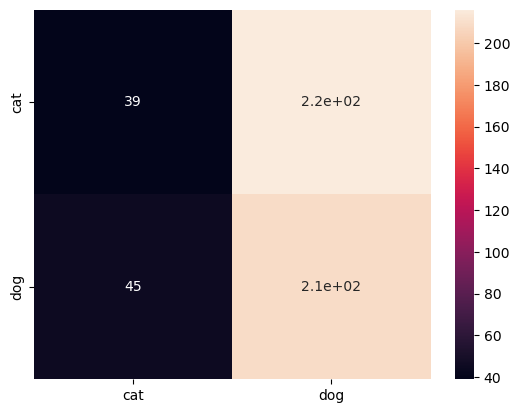

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])

# Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

In [17]:
from tensorflow.keras.applications import VGG16, VGG19
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE=[224,224]
 
#Train data(images) path
train_path='C:/Users/SIRISHA\ALML/AI SOLUTION/archive (2)/training_set/training_set'
 
#Test data(images) path
valid_path='C:/Users/SIRISHA/ALML/AI SOLUTION/archive (2)/test_set/test_set'

In [19]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_base.layers:
    layer.trainable = False
from tensorflow.keras.applications import VGG19

vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg19_base.layers:
    layer.trainable = False

In [20]:
#Getting number of classes
folders=glob('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train/*')

In [21]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg16_base.output)
#Defined the output layer
prediction=Dense(len(folders),activation='sigmoid')(x)

In [22]:
model=Model(inputs=vgg16_base.input,outputs=prediction)
 
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
#to perform image augmentation
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
 shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')
print('='*100)
#Testing set
print('Test length:\n')
test_set=test_datagen.flow_from_directory('C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test',
 target_size=(224,224),
 batch_size=32,
class_mode='categorical')

Training length:

Found 502 images belonging to 2 classes.
Test length:

Found 509 images belonging to 2 classes.


In [25]:
r=model.fit(training_set,
 validation_data=test_set,
 epochs=30,
 steps_per_epoch=len(training_set),
 validation_steps=len(test_set))

Epoch 1/30
16/16 [==============================] - 373s 24s/step - loss: 0.8253 - accuracy: 0.6335 - val_loss: 0.4405 - val_accuracy: 0.7898
Epoch 2/30
16/16 [==============================] - 302s 19s/step - loss: 0.2554 - accuracy: 0.8964 - val_loss: 0.3208 - val_accuracy: 0.8743
Epoch 3/30
16/16 [==============================] - 306s 20s/step - loss: 0.1809 - accuracy: 0.9363 - val_loss: 0.3361 - val_accuracy: 0.8625
Epoch 4/30
16/16 [==============================] - 299s 19s/step - loss: 0.1356 - accuracy: 0.9482 - val_loss: 0.3043 - val_accuracy: 0.8743
Epoch 5/30
16/16 [==============================] - 309s 20s/step - loss: 0.1226 - accuracy: 0.9622 - val_loss: 0.3029 - val_accuracy: 0.8723
Epoch 6/30
16/16 [==============================] - 303s 19s/step - loss: 0.1042 - accuracy: 0.9681 - val_loss: 0.2991 - val_accuracy: 0.8821
Epoch 7/30
16/16 [==============================] - 288s 19s/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.3132 - val_accuracy: 0.8762
Epoch 

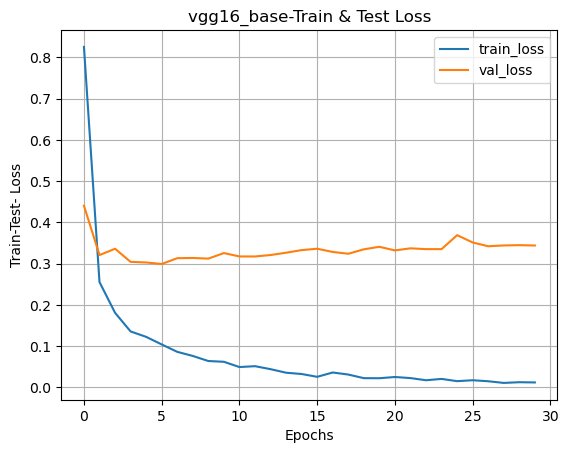

<Figure size 640x480 with 0 Axes>

In [26]:
#loss
plt.title('vgg16_base-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Loss & Val_loss')

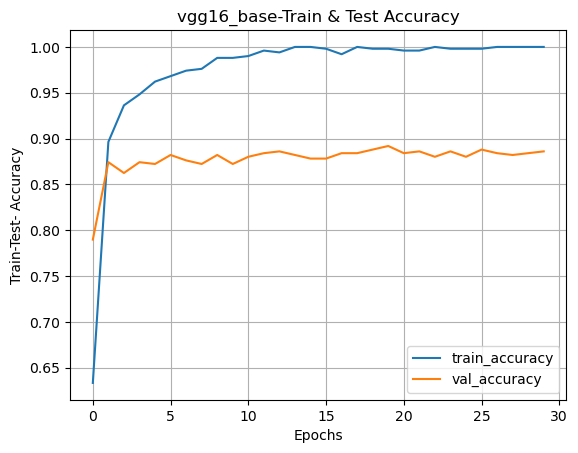

<Figure size 640x480 with 0 Axes>

In [27]:
#Accuracy
plt.title('vgg16_base-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16_base--Accuracy & Val_accuracy')

In [28]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg16_base_dog_cat_classify.h5')

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save('vgg16_base_dog_cat_classify.keras')

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [31]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['cat','dog']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

16/16 [==============================] - 187s 12s/step
Confusion Matrix
[[138 117]
 [125 129]]
Classification Report
              precision    recall  f1-score   support

         cat       0.52      0.54      0.53       255
         dog       0.52      0.51      0.52       254

    accuracy                           0.52       509
   macro avg       0.52      0.52      0.52       509
weighted avg       0.52      0.52      0.52       509

Accuracy Score
0.5245579567779961


<Axes: >

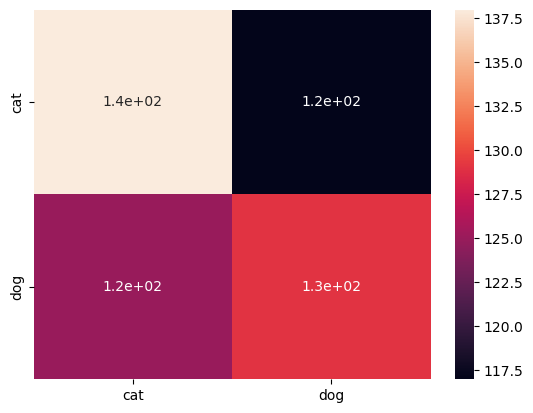

In [32]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['cat','dog'],
 yticklabels=['cat','dog'])

# for VGG19

Found 402 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Class Names: ['cats', 'dogs']
Found 509 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26447425 (100.89 MB)
Trainable params: 6423041 (24.50 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
Epoch 1/

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


12/12 [==============================] - 228s 19s/step - loss: 5.8836 - accuracy: 0.5405 - val_loss: 1.6875 - val_accuracy: 0.5104
Epoch 2/10
12/12 [==============================] - 231s 19s/step - loss: 2.4281 - accuracy: 0.5234 - val_loss: 0.5256 - val_accuracy: 0.7188
Epoch 3/10
12/12 [==============================] - 225s 19s/step - loss: 0.9064 - accuracy: 0.6324 - val_loss: 1.2620 - val_accuracy: 0.5104
Epoch 4/10
12/12 [==============================] - 220s 19s/step - loss: 0.7959 - accuracy: 0.6324 - val_loss: 0.5527 - val_accuracy: 0.6667
Epoch 5/10
12/12 [==============================] - 224s 19s/step - loss: 0.7831 - accuracy: 0.6459 - val_loss: 0.5683 - val_accuracy: 0.6354
Epoch 6/10
12/12 [==============================] - 224s 19s/step - loss: 0.6719 - accuracy: 0.6676 - val_loss: 0.4782 - val_accuracy: 0.7500
Epoch 7/10
12/12 [==============================] - 221s 19s/step - loss: 0.5441 - accuracy: 0.7351 - val_loss: 0.3767 - val_accuracy: 0.8958
Epoch 8/10
12/12 

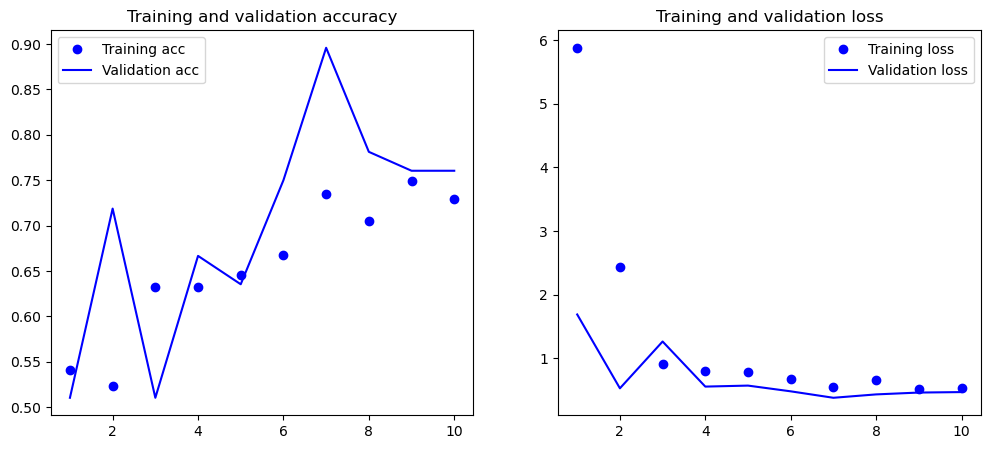

16/16 [==============================] - 180s 11s/step - loss: 0.5651 - accuracy: 0.6935
Test Accuracy: 69.35%
Test Loss: 0.5651
16/16 [==============================] - 188s 12s/step
Confusion Matrix (Test):
 [[255   0]
 [254   0]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       255
           1       0.00      0.00      0.00       254

    accuracy                           0.50       509
   macro avg       0.25      0.50      0.33       509
weighted avg       0.25      0.50      0.33       509



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


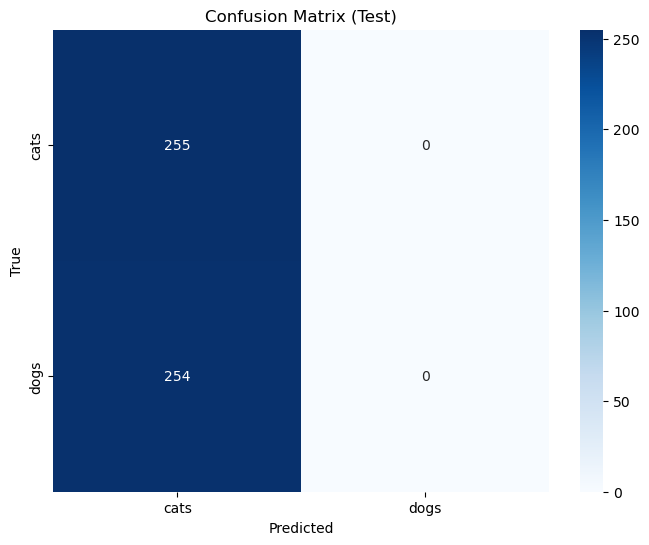

In [34]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19  # Change here
from keras import layers
from keras import models
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import seaborn as sns

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Paths
train_path = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train'
test_path = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test'

# Use ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Get the class names from the subdirectories
class_names = sorted(train_generator.class_indices.keys())

# Print the class names
print("Class Names:", class_names)

# Use ImageDataGenerator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Create the VGG19 model  # Change here
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Change here

model_vgg19 = models.Sequential()
model_vgg19.add(base_model_vgg19)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(1, activation='sigmoid'))

# Freeze the pre-trained layers
for layer in base_model_vgg19.layers:
    layer.trainable = False

model_vgg19.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Print the model summary
model_vgg19.summary()

# Define callbacks (ModelCheckpoint)
checkpoint = ModelCheckpoint('best_model_vgg19.h5', monitor='val_accuracy', save_best_only=True)

# Train the model
history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    callbacks=[checkpoint]
)

# Plot the training and validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_vgg19)

# Evaluate on the test set
test_loss, test_acc = model_vgg19.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

# Predict the classes for the test set
y_test_pred = model_vgg19.predict(test_generator)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Adjust for multiclass classification

# Get the true labels
y_test_true = test_generator.classes

# Calculate confusion matrix and classification report
conf_matrix_test = confusion_matrix(y_test_true, y_test_pred_classes)
class_report_test = classification_report(y_test_true, y_test_pred_classes)

print("Confusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", class_report_test)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 2.Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train'
validation_data_dir = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test'

# Define ImageDataGenerator for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and target size
batch_size = 32
target_size = (224, 224)  # Assuming images are resized to (224, 224) for InceptionV3 or MobileNet

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 502 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


In [37]:
NUM_CLASSES = 2
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 19s 0us/step


In [42]:
NUM_EPOCHS = 10  # Define the number of epochs

history_inception = model.fit(train_generator, 
                              epochs=NUM_EPOCHS, 
                              validation_data=validation_generator)

Epoch 1/10
16/16 [==============================] - 29s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9764
Epoch 2/10
16/16 [==============================] - 30s 2s/step - loss: 0.0353 - accuracy: 0.9841 - val_loss: 0.1181 - val_accuracy: 0.9745
Epoch 3/10
16/16 [==============================] - 31s 2s/step - loss: 0.0123 - accuracy: 0.9940 - val_loss: 0.1071 - val_accuracy: 0.9764
Epoch 4/10
16/16 [==============================] - 30s 2s/step - loss: 0.0150 - accuracy: 0.9940 - val_loss: 0.1556 - val_accuracy: 0.9725
Epoch 5/10
16/16 [==============================] - 42s 3s/step - loss: 0.0108 - accuracy: 0.9960 - val_loss: 0.1081 - val_accuracy: 0.9725
Epoch 6/10
16/16 [==============================] - 35s 2s/step - loss: 0.0203 - accuracy: 0.9920 - val_loss: 0.1161 - val_accuracy: 0.9745
Epoch 7/10
16/16 [==============================] - 30s 2s/step - loss: 0.0133 - accuracy: 0.9980 - val_loss: 0.1244 - val_accuracy: 0.9725
Epoch 8/10
16/16 [==

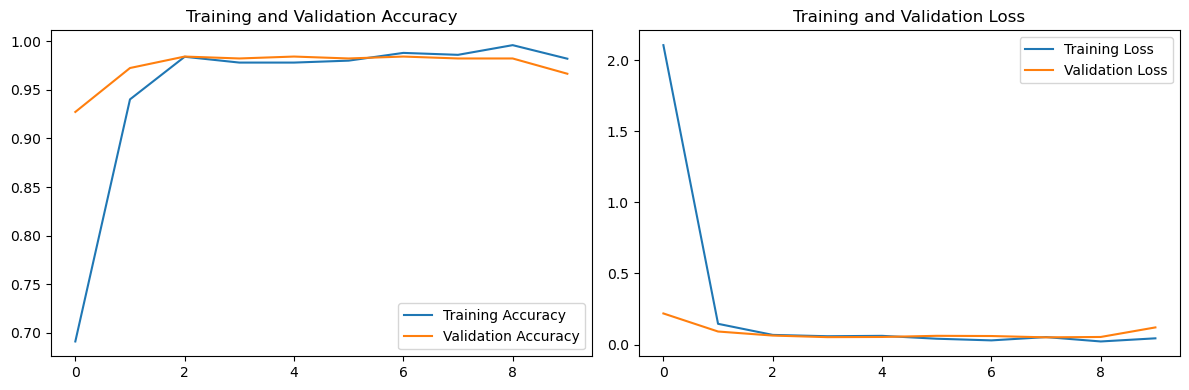

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_inception.history['accuracy'], label='Training Accuracy')
plt.plot(history_inception.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_inception.history['loss'], label='Training Loss')
plt.plot(history_inception.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

# MobileNet

Found 502 images belonging to 2 classes.
Found 509 images belonging to 2 classes.


17225924/17225924 [==============================] - 9s 0us/step
Epoch 1/10
16/16 [==============================] - 43s 2s/step - loss: 0.5765 - accuracy: 0.8347 - val_loss: 0.0774 - val_accuracy: 0.9725
Epoch 2/10
16/16 [==============================] - 37s 2s/step - loss: 0.0891 - accuracy: 0.9741 - val_loss: 0.0781 - val_accuracy: 0.9764
Epoch 3/10
16/16 [==============================] - 40s 3s/step - loss: 0.0490 - accuracy: 0.9900 - val_loss: 0.0892 - val_accuracy: 0.9725
Epoch 4/10
16/16 [==============================] - 44s 3s/step - loss: 0.0621 - accuracy: 0.9761 - val_loss: 0.1488 - val_accuracy: 0.9607
Epoch 5/10
16/16 [==============================] - 35s 2s/step - loss: 0.0203 - accuracy: 0.9920 - val_loss: 0.0746 - val_accuracy: 0.9745
Epoch 6/10
16/16 [==============================] - 32s 2s/step - loss: 0.0157 - accuracy: 0.9960 - val_loss: 0.1241 - val_accuracy: 0.9607
Epoch 7/10
16/16 [==============================] - 31s 2s/step - loss: 0.0382 - accuracy: 0.98

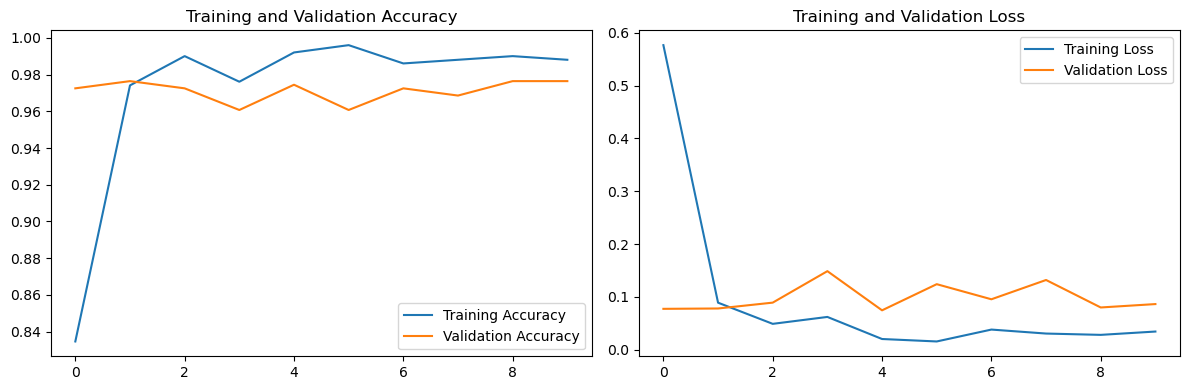

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Define paths to your dataset
train_data_dir = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_train'
validation_data_dir = 'C:/Users/admin/DL_python(AI Solution Developer)/cat_dog_test'

# Define ImageDataGenerator for train and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and target size
batch_size = 32
target_size = (224, 224)  # Assuming images are resized to (224, 224) for MobileNet

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

NUM_CLASSES = 2  # Update with the number of classes in your dataset

# Load MobileNet model without the top classification layers
base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NUM_EPOCHS = 10  # Define the number of epochs

history_mobilenet = model.fit(train_generator, 
                              epochs=NUM_EPOCHS, 
                              validation_data=validation_generator)

# Visualization similar to the one you provided for InceptionV3
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Training Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()